In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split

# **CONVOLUTIONAL NEURAL NETWORK with PYTORCH**

<a id="1"></a>

# **CONVOLUTIONAL NEURAL NETWORK**

* CNN's are used for object recognation, object segmentation, detection and computer vision.
* CNN's learn directly from image data, so there is no need to perform manuel feature extraction which is commonly required in regular deep neural networks.


<a id="2"></a>

# **LOAD & PREPARE DATA**

In [3]:
train=pd.read_csv("../input/mnist-data/train.csv",dtype=np.float32)

In [4]:
label_array=train.label.values
features_array=train.iloc[:,train.columns != "label"].values/255 # Normalize

In [5]:
# Train - Test Split:
features_train,features_test,label_train,label_test=train_test_split(features_array,label_array,test_size=0.2,random_state=42)

In [6]:
# Lets create feature and label tensor for train:
featuresTrain=torch.from_numpy(features_train)
labelTrain=torch.from_numpy(label_train).type(torch.LongTensor)

# Now create feature and label tensor for test:
featuresTest=torch.from_numpy(features_test)
labelTest=torch.from_numpy(label_test).type(torch.LongTensor)

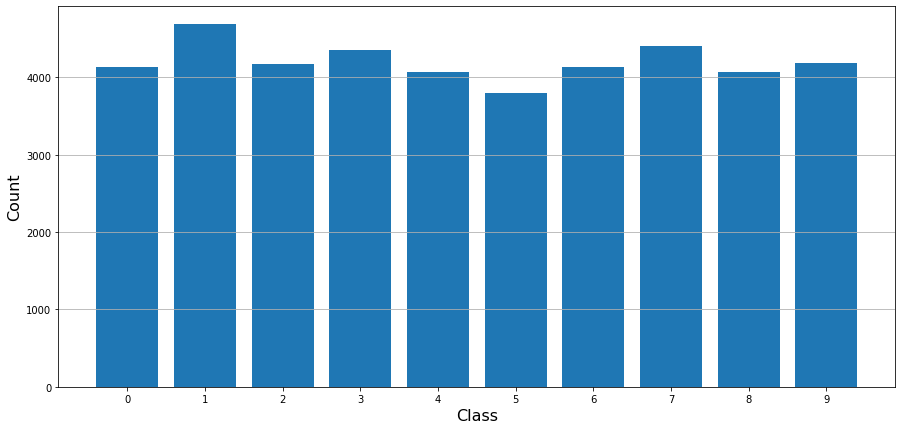

In [7]:
plt.figure(figsize=(15,7))
plt.bar(train["label"].value_counts().index,train["label"].value_counts())
plt.xticks(np.arange(len(set(train['label']))))
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid('on', axis='y')

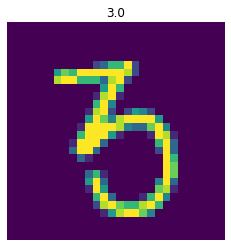

In [8]:
# Lets visualize some of images:
plt.imshow(features_array[90].reshape(28,28))
plt.axis("off")
plt.title(str(label_array[90]))
plt.show()

<a id="3"></a>

# **CONVOLUTIONAL MODEL**

In [9]:
# CNN Model:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel,self).__init__()
        
        # First Convolution
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=1)
        self.relu1=nn.ReLU()
        
        # Max Pooling 1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        # Second Convolution
        self.cnn2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1)
        self.relu2=nn.ReLU()
        
        # Max Pooling 2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        # Fully Connected 1
        self.fc1=nn.Linear(32*4*4,10)
    
    def forward(self,x):
        # First Convolution
        out=self.cnn1(x)
        out=self.relu1(out)
        # Max pooling
        out=self.maxpool1(out)
        # Second Convolution
        out=self.cnn2(out)
        out=self.relu2(out)
        #Max pooling
        out=self.maxpool2(out)
        # Flatten
        out=out.view(out.size(0),-1)
        # Linear Function
        out=self.fc1(out)
        return out

In [10]:
batch_size=100
n_iter=2500
num_epoch=n_iter/(len(features_train)/batch_size)
num_epoch=int(num_epoch)

In [11]:
# PyTorch Train Test
train_py=torch.utils.data.TensorDataset(featuresTrain,labelTrain)
test_py=torch.utils.data.TensorDataset(featuresTest,labelTest)

In [12]:
# Data Loader
train_loader=torch.utils.data.DataLoader(train_py,batch_size=batch_size,shuffle=False)
test_loader=torch.utils.data.DataLoader(test_py,batch_size=batch_size,shuffle=False)

In [13]:
model=CNNModel()
error=nn.CrossEntropyLoss()
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

<a id="4"></a>

# **TRAIN**

In [14]:
count=0
loss_list=[]
iteration_list=[]
accuracy_list=[]

for epoch in range(num_epoch):
    for i, (images,labels) in enumerate(train_loader):
        train=Variable(images.view(100,1,28,28))
        labels=Variable(labels)
        
        # Gradients
        optimizer.zero_grad()
        # Forward Propagation
        outputs=model(train)
        # Calculate Sotmax and Cross Entropy Loss
        loss=error(outputs,labels)
        # Calculate Gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        count+=1
        
        if count % 20 ==0:
            correct=0
            total=0
            
            for images,labels in test_loader:
                test=Variable(images.view(100,1,28,28))
                
                # Forward Propagation
                outputs=model(test)
                # Prediction
                prediction=torch.max(outputs.data,1)[1]
                total +=len(labels)
                correct += (prediction==labels).sum()
            accuracy=100*correct/float(total)
            
            # Store Results:
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 100 == 0:
            print("Iteration {} Loss: {} Accuracy {} %".format(count,loss,accuracy))

Iteration 100 Loss: 0.27129480242729187 Accuracy 90.25 %
Iteration 200 Loss: 0.2841324806213379 Accuracy 94.36904907226562 %
Iteration 300 Loss: 0.2091638445854187 Accuracy 95.02381134033203 %
Iteration 400 Loss: 0.14656944572925568 Accuracy 96.29762268066406 %
Iteration 500 Loss: 0.10585996508598328 Accuracy 96.72618865966797 %
Iteration 600 Loss: 0.15081888437271118 Accuracy 96.6547622680664 %
Iteration 700 Loss: 0.08111236244440079 Accuracy 96.96428680419922 %
Iteration 800 Loss: 0.06348193436861038 Accuracy 97.39286041259766 %
Iteration 900 Loss: 0.026358989998698235 Accuracy 97.52381134033203 %
Iteration 1000 Loss: 0.051215361803770065 Accuracy 97.71428680419922 %
Iteration 1100 Loss: 0.012491599656641483 Accuracy 97.88095092773438 %
Iteration 1200 Loss: 0.016971861943602562 Accuracy 97.98809814453125 %
Iteration 1300 Loss: 0.06939448416233063 Accuracy 97.76190185546875 %
Iteration 1400 Loss: 0.25736871361732483 Accuracy 97.75 %
Iteration 1500 Loss: 0.045227158814668655 Accuracy 9

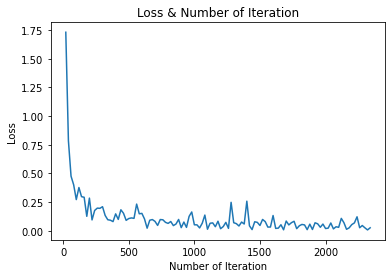

In [15]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.title("Loss & Number of Iteration")
plt.show()

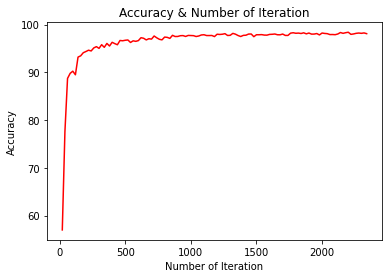

In [16]:
plt.plot(iteration_list,accuracy_list,color="red")
plt.xlabel("Number of Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy & Number of Iteration")
plt.show()